# Multiclass Classification

- Hand-write Digit data 사용  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names)

(1797, 64)
(1797, 8, 8)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


## 임의의 image 시각화

<Figure size 432x288 with 0 Axes>

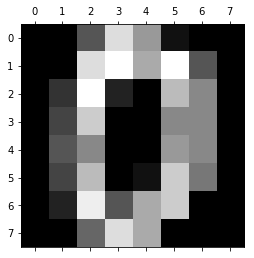

In [4]:
plt.gray()
plt.matshow(digits.images[0])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

### One-vs-Rest 로 multiclass 분류

In [7]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.score(X_test, y_test)

0.9511111111111111

0


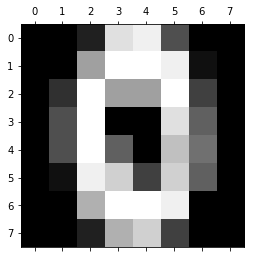

In [9]:
plt.matshow(digits.images[55])
print(digits.target[55])

In [10]:
model.predict([digits.data[55]])

array([0])

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  1, 48,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 49,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 48,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 33,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  1, 48]], dtype=int64)

Test Accuracy : 0.98%


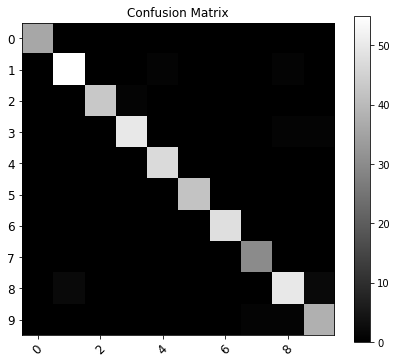

In [21]:
plt.figure(figsize=(7,6))
plt.imshow(cm)
plt.colorbar()
plt.xticks(np.arange(10), rotation=45, fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.title('Confusion Matrix')

print('Test Accuracy : {:.2f}%'.format(accuracy_score(y_test, y_pred)))